# COVID-19 CASE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pandas_profiling
from pandas_profiling import ProfileReport

### load data

In [2]:
data = pd.read_csv("RAIPUR_CORONAVIRUS_CASES.csv", sep=',')
data = data [['ID', 'Total_CASES']]
#collection of cases set from first day of case found in Raipur
data

,ID,Total_CASES
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
128,129,27096
129,130,29283
130,131,31649
131,132,34173


In [3]:
data.head()

,ID,Total_CASES
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [4]:
data.tail()

,ID,Total_CASES
128,129,27096
129,130,29283
130,131,31649
131,132,34173
132,133,36832


### Detail review of datset

In [5]:
x = np.array (data['ID']).reshape(-1,1)
y = np.array (data['Total_CASES']).reshape(-1,1)

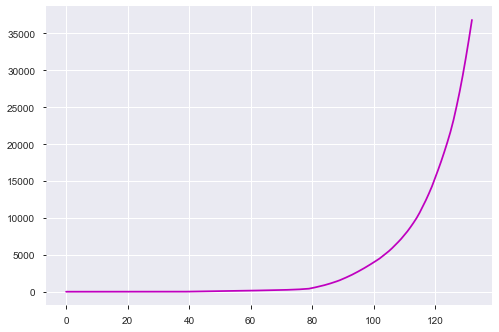

In [6]:
#ploting graph

plt.plot(y,'-m')
plt.show()

## Polynomial Regression

In [7]:
polyfeat = PolynomialFeatures(degree = 6)
x = polyfeat.fit_transform(x)
#print (x)

In [8]:
#polyfeat = PolynomialFeatures(degree = 3)
#x = polyfeat.fit_transform(x)
#print (x)

##  Training Data and prepare model

In [9]:
model = linear_model.LinearRegression()

In [10]:
model.fit(x, y)
accuracy = model.score(x, y)
print(f'Accuracy:{round(accuracy*100,3)} %')
#show to accuracy of data

Accuracy:99.941 %


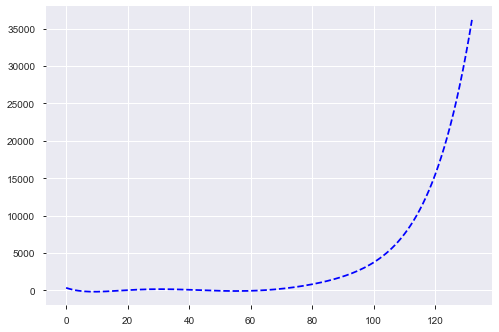

In [11]:
#ploting the test-model data
y0 = model.predict (x)
plt.plot(y0, '--b')
plt.show()

## Comparing model data with actual data

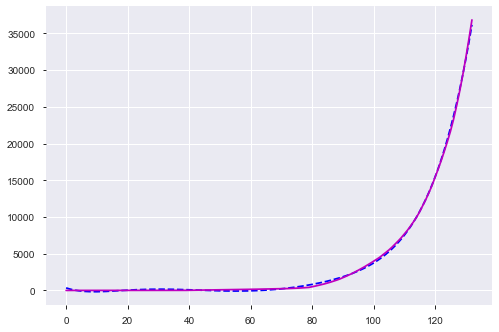

In [12]:
plt.plot(y0, '--b')
plt.plot(y,'-m')
plt.show()

## To find the number of cases for (n) number of days || Prediction 

In [13]:
days= 2
print(f'Prediction - Case after {days} days:', end = '')
print(round(int(model.predict(polyfeat.fit_transform([[133 + days]]))), 2), 'lakhs')

Prediction - Case after 2 days:41503 lakhs


## 41503 ~ 31/07/2020, 42542 
## as we increase the polynomial degree the accuracy may get much better

In [14]:
x1 = np.array(list(range(1, 234 + days))). reshape(-1, 1)
y1 = model.predict(polyfeat.fit_transform(x1))

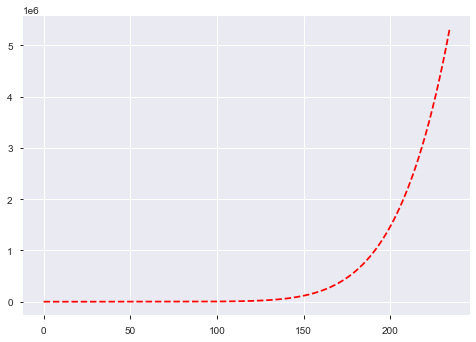

In [15]:
plt.plot(y1, '--r')

###     The predicted time-series model